# Problem 1: Studying the Fourier Transform

We will take a look at what Fourier transforms do.  In its simplest form, a 1D Fourier transform takes a time-varying function, measures possible cycles it contains, and returns the amplitude, offset and rotation for all cycles that were found.

As we know from class, the (discrete) Fourier Transform is defined as:

$$X_k = \sum_{n=0}^{N-1} x_n \, e\text{^}(-2\pi i k n / N)$$

The inverse Fourier transform is defined as:

$$X_n = \frac 1 N \sum_{n=0}^{N-1} x_k \, e\text{^}(2\pi i k n / N)$$

Here, both $X$'s are arrays of data of length $N$. $k$ and $n$ each represent a particular index in $X$.

### Start out by implementing your own Fourier and Inverse Fourier transform using the expressions above

- `fourier` should take in an array of time series data `x`, and output the Fourier transformed signal using the equations above
- `inv_fourier` should take in a Fourier-transformed time series array `X`, and output the time series array corresponding to it

**Note:** Working with complex numbers is possible in Python! $i$ is written as `1j`, $2i$ as `2j`, etc.

By default, a `numpy` array will **not** store complex numbers properly. You should initialize them with `np.zeros(N, dtype=complex)` to ensure they work properly.

In [72]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np  # numerical routines 
import matplotlib.cm as cmap  ## color map for 2d plotting
%matplotlib inline

pi2 = np.pi * 2.0 # useful constant: 2 pi


In [80]:
def fourier(x):
    # YOUR CODE HERE

def inv_fourier(x):
    # YOUR CODE HERE

### We will now test your code by inserting a sine wave signal, then checking the Fourier transform in 3 ways

1. That your FFT output looks as expected
2. That your FFT and inverse-FFT functions are actually inverses of each other
3. That your FFT implementation matches that of `numpy`.

First, we create a sine wave signal to test your function (below).

/home/nico/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


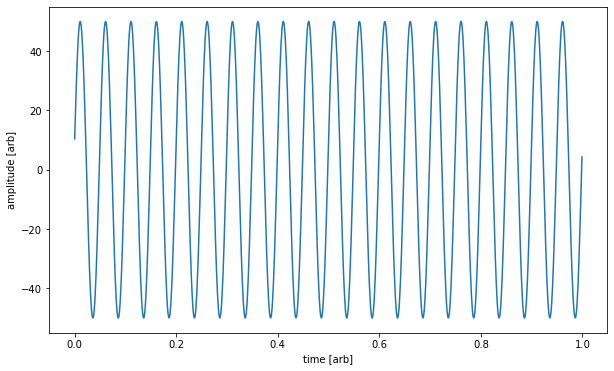

In [107]:
N = 1024 # Number of samples
a = 50 # amplitude
f = 20. # frequency
p = 12 # phase (deg)

## make a pure sine wave array
t = np.arange(0,N, dtype=complex)/N   ## a time variable from 0 to 1
fn = a * np.sin(2 * np.pi * f * t + p / 360. * 2 * np.pi)   ## the pure sine wave 
plt.figure(figsize=(10, 6))  ## this resizes the figure to make it fit the screen
plt.plot(t,fn.real)
plt.xlabel("time [arb]")
plt.ylabel("amplitude [arb]")
plt.show()

Some notes:

1. The output of the FFT includes both positive and negative frequency components (right and left going waves) as the algorithm can not distinguish these two cases.
2. The amplitude of the waves is given by the absolute value (`np.abs`) of the FFT. Eg: If the FFT returns a + bi, the amplitude is sqrt(a^2 + b^2).
3. Zero frequency occurs on the **far left side of the array**, not in the center. For reference, the arrangement is: Right-going waves on the left, counting up to the max frequency in the array; then left-going waves on the right, counting down to the first non-zero frequency.

This can be confusing, so we've written the function below -- `convert_time_frequency` -- to handle the transformation between time and frequency for you. 
- Given a time array `t`, it returns the appropriate frequency array `f` for data that's been Fourier transformed.
- Given a frequency array `f`, it returns the appropriate time array `t` for data that's been inverse-Fourier transformed.

In [111]:
# Converts a time array to a frequncy array, and vice-versa
def convert_time_frequency(init_array):
    N = len(init_array)
    delta = (init_array[1]-init_array[0]).real  ## the step size for the t grid
    freq_nyquist = 1/delta/2.
    converted_array = np.roll(np.linspace(-1,1,N)*freq_nyquist, int(N/2))
    return converted_array

### Check #1: The FFT returns the signal we expect

Use the `convert_time_frequency` function to convert the time array `t` to an array in frequency space `f`. Then, calculate the Fourier transform using your Fourier transform function and plot versus frequency. The time signal `fn` is a sine wave with frequency 20, so you should see a spike at that frequency. You should also see a spike at -20, since the FFT cannot distinguish between left-moving and right-moving waves.


In [279]:
# YOUR CODE HERE

### Check #2: Your functions correctly invert each other

Verify that the FFT and iFFT are in fact inverse functions to within machine precision.
- Due to [floating point errors](https://www.geeksforgeeks.org/floating-point-error-in-python/), `ifft(fft(fn))` might not return exactly `fn`, even if your code is perfect. You should check that they're the same to within 10^-9 for every value in `fn`

In [280]:
# YOUR CODE HERE

### Check #3: Your FFT result matches that from `numpy`

In [281]:
import numpy.fft as npfft

# YOUR CODE HERE

# Problem 2: Hunting for Exoplanets


### The Kepler satellite has discovered many multi-planet systems. You can download artwork for some of them even at the [Exoplanet Travel Bureau](https://exoplanets.nasa.gov/alien-worlds/exoplanet-travel-bureau/)

<img src="figures/Kepler-186f_small.jpg" width=500px>

### But is there a system with 8 planets??? In fact, there may be at least one - [Kepler 90](https://www.nytimes.com/2017/12/14/science/eight-planets-star-system.html). This, along with most other Kepler planets, were not discovered through radial velocity measurements like our example in class (i.e. that nice parameteric model doesn't apply), but were rather discovered through transits - dips in the light of the star as the planet moves around it.

<img src="figures/Transiting-Exoplanet-Light-Curve.gif">

### You get to find 3 exoplanets in the Kepler-90 system with `gatspy`. 

### To get the Kepler data, you'll need the `lightkurve` package and the `gatspy` package.

> `pip install lightkurve==1.11.3`

> `pip install gatspy==0.3`

### I've included some code to get the light curve, clean it and remove the NaNs, but not outliers (you can judge the wisdom of outlier removal when you are hunting for planets).

<hr>

# Hints

* The planets you are looking for have periods somewhere between **10 days** and the **maximum timespan of the lightcurve data** (around 1500 days). Your periodogram will not need to extend beyond that.

* `lightkurve` has a bunch of useful tutorials available: https://docs.lightkurve.org/index.html

* **The Exoplanet Archive** might be of help: https://exoplanetarchive.ipac.caltech.edu/index.html

<hr>

# Happy (planet) hunting!

In [163]:
%matplotlib inline
import numpy as np
import lightkurve as lk
import gatspy
import matplotlib.pyplot as plt

Done!
Stitching lightcurves together and processing...
Plotting...


<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

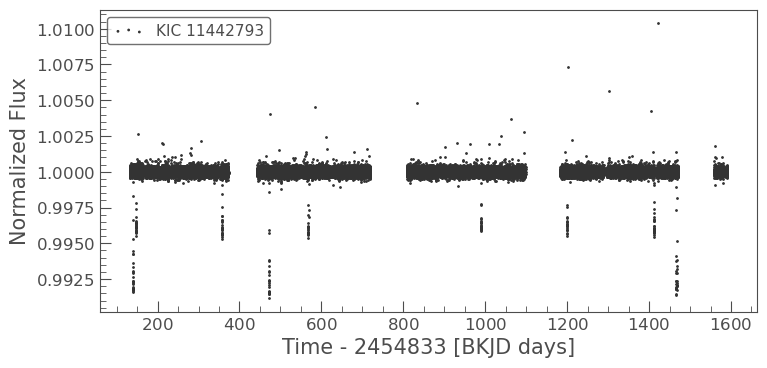

In [164]:
print("Downloading lightcurve files from Kepler-90...")

lcfs = lk.search_lightcurvefile('Kepler-90', mission='Kepler').download_all()

print("Done!")

def squelch_rednoise(lc):
    corrected_lc = lc.normalize().flatten(window_length=51)
    return corrected_lc

print("Stitching together lightcurves and processing...")

stitched_lc = lcfs.PDCSAP_FLUX.stitch(corrector_func=squelch_rednoise)
clc = stitched_lc.remove_nans()

print("Plotting...")

clc.scatter()

### First, get a periodogram directly from `lightkurve`. This should give you an idea of how many exoplanets there are, and rough guesses as to their periods.

Lightkurve provides a function [to_periodogram](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.to_periodogram.html) to do this. You'll need to supply a few arguments to this function:
- `method=`: The method can either be "lombscargle" or "boxleastsquares". Of these two, "boxleastsquares" is more efficient. (Feel free to try using "lombscargle" for comparison, though it may take a long time to run!)
- `period=`: The `period` argument takes in an array of periods that your periodogram will test for. This argument is very important! If you supply too few periods, your periodogram won't be sensitive to the specific frequencies of the exoplanet orbits you're looking for. Supply too many, and it will take a very long time to run. You may need to experiment with this to find a good value.

This function will return a `Periodogram` object, which has a few important attributes:
- `periodogram.plot()`: Automatically plots the periodogram with properly labeled axes.
- `periodogram.period`: An array of periods (equal to the `period=` argument from `to_periodogram`)
- `periodogram.frequency:` An array of frequencies (equal to 1/period).
- `periodogram.power:` An array of the "power" of each period in the periodogram.
- `periodogram.transit_time:` An array of "transit times". If an exoplanet has a given period, then the "transit time" is the time of its first detected transit in the lightcurve.

To make sure your periodogram is working. use the `periodogram.plot()` function. The result should look something like the image below. If it doesn't, try adjusting your `period=` argument.

<img src='figures/Example_periodogram.png'>


In [282]:
# YOUR CODE HERE

### Next, identify the periods of ~8-10 of the most significant peaks in this periodogram.

**Hold onto the periods and transit times that correspond to these peaks** (ie: store them in a list or array).

There are a few ways to identify the peaks:
- You can pick out a part of the `power` array containing the peak you're looking for, then use `np.argmax` to identify it exactly
- Alternately, the function `scipy.signal.find_peaks` can identify all of the peaks at once. You may need to tune its arguments to make it work. Key arguments to this function include `height=`, `distance=`, and `threshold=`.
    - Note that ~8-10 peaks is just a rough number. It's ok to find less/more than this, but if you've identified dozens, you're doing something wrong!

Some of the numbers output by `lightkurve` are in the form of "quantities", which have units attached to them (in this case "days"). If this causes you problems, you can convert the quantities to regular Python values (floating point numbers) by calling `quantity.value`.

**As a final filtering step, you should remove periods that are within 10 days of 365 days.** These are a result of the Earth's orbit, not an exoplanet's.

In [284]:
from scipy.signal import find_peaks

# YOUR CODE HERE

### Make a plot of `period` vs. `power` from your periodogram, and show the potential peaks you found in the spectrum (corresponding to potential planets). Print out a list of the potential periods.

In [285]:
# YOUR CODE HERE

### Now, remove "aliases" of lower periods from the list.

Recall that if one period shows up in a periodogram, then integer multiples of that period (2T, 3T) will show up as well. These are "aliases" of the smaller period, and they do not represent unique exoplanets in this 

To remove aliases:
- For each period, compare it to every period you found that's larger than it.
- **If the larger period is within 1 day of an integer multiple of the smaller period's value, remove the larger period (& transit time) from the list**. (For this dataset, you should check every integer multiple up to about 10.)

In [286]:
# YOUR CODE HERE

### To get the true "best fit" for each period, start with your estimates of the period so far and optimize them with `gatspy`

For each period you've guessed so far:
- Set the `model.optimizer.period_range` to a narrow region around the period. Eg: `(period-1, period+1)`
- Then, call `model.fit(time, flux, flux_err)`. You can find this data in your lightcurve, `clc`
- Once you've run this command, the best-fit period will be stored in `model.best_period`.

In [287]:
# Sets up the optimizer
model = gatspy.periodic.LombScargle(fit_period=True, Nterms=31, center_data=False)
model.optimizer.set(first_pass_coverage=10)

# Now, for each period, fit the model to the data in `clc` to find the true best-fit period

# YOUR CODE HERE

### Finally, plot the folded lightcurves to see the signals from your exoplanets!

You will need to use the best-fit periods you just got from `gatspy`, along with the best-fit transit times you got from your periodogram.

Below, we've written an example of how to plot the folded lightcurve. We've deliberately picked a period and a transit time that do not correspond to a real exoplanet, so no signal shows up.

If you've found the correct periods and transit times, you should be able to see a small dip at `phase=0` in your folded light curves. This means you've found a real signal from an exoplanet!

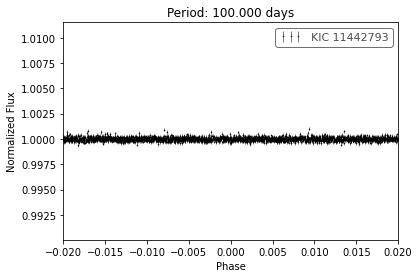

In [293]:
# -- EXAMPLE: How to plot a folded lightcurve --

# The folded lightcurve from this period and transit time will show no evidence of an exoplanet.
# Yours should contain a "dip" at phase=0.

period_bad = 100
transit_time_bad = 50

clc_folded = clc.fold(period_bad, t0=transit_time_bad)
ax = plt.figure().gca()
clc_folded.errorbar(ax=ax, marker='.', color='k')
ax.set_xlim(-0.02, 0.02)
ax.set_title('Period: %.3f days'%period_bad)
plt.show()

In [291]:
# YOUR CODE HERE

# Q3 (Extra Credit: 1 point): Did you fill out the survey (please write in yes/no)? (https://forms.gle/z6diB778LV7db9EL9)